In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [5]:
nb_classes = 10
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [6]:
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [9]:
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

training_epochs = 15
batch_size = 100

Epoch: 0001 cost = 2.861561021
Epoch: 0002 cost = 1.098493232
Epoch: 0003 cost = 0.873272508
Epoch: 0004 cost = 0.762330836
Epoch: 0005 cost = 0.693006853
Epoch: 0006 cost = 0.643858107
Epoch: 0007 cost = 0.606247234
Epoch: 0008 cost = 0.576318596
Epoch: 0009 cost = 0.552230588
Epoch: 0010 cost = 0.531757252
Epoch: 0011 cost = 0.514306641
Epoch: 0012 cost = 0.499299980
Epoch: 0013 cost = 0.485587192
Epoch: 0014 cost = 0.473901607
Epoch: 0015 cost = 0.463514965
Learning finished
Accuracy:  0.8915
Label:  [0]
Prediction:  [0]


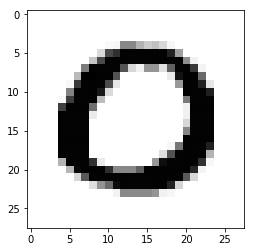

In [17]:
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        # i는 이터레이션, 전체 데이터 사이즈를 batch_size로 나누면 된다(tatal_batch).
        for i in range(total_batch):
            # batch_size 만큼 데이터를 훈련 시킴
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1),
              'cost =', '{:.9f}'.format(avg_cost))

    print("Learning finished")

    # Test the model using test sets
    # 학습에 한번도 사용하지 않았던 테스트 데이터를 넣어줌
    # tensor에 eval이라는 함수를 호출하여 sess.run을 실행할 수 있음
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    # one hot, 즉 결과값을 출력함, 인덱스는 0부터 이므로 1을 더함
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

    # 랜덤 이미지를 출력
    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()

RuntimeError: Attempted to use a closed Session.

In [19]:
mnist

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_chart'